In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')                                                 # importing python libraries

In [2]:
df = pd.read_csv("data1/Financial_Analytics_data.csv")  # importing dataset

In [3]:
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))                    # defines (rows,columns)

Rows: 488 Columns: 5


In [4]:
df.head(15)                                                                       #first 10 data entry from dataset

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
5,6,Hind. Unilever,288265.26,8590.00,NaN
6,7,Maruti Suzuki,263493.81,19283.20,NaN
7,8,Infosys,248320.35,17794.00,NaN
8,9,O N G C,239981.50,22995.88,NaN
9,10,St Bk of India,232763.33,57014.08,NaN


In [5]:
df.tail(15)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
473,486,Mahindra Logis.,3187.51,835.06,NaN
474,487,Heritage Foods,3185.45,581.74,NaN
475,488,Mah. Seamless,3164.73,563.66,NaN
476,489,Navneet Educat.,3148.36,174.41,NaN
477,490,Firstsour.Solu.,3139.94,887.24,NaN
478,491,Kaveri Seed Co.,3125.83,70.64,NaN
479,492,Star Ferro Cem.,3115.98,393.49,NaN
480,493,Deepak Fert.,3079.06,1644.92,NaN
481,494,Va Tech Wabag,3041.93,460.89,NaN
482,495,Prime Focus,3031.50,609.61,NaN


In [6]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [7]:
df.nunique()  

S.No.                488
Name                 488
Mar Cap - Crore      479
Sales Qtr - Crore    365
Unnamed: 4            94
dtype: int64

In [8]:
for i, col in enumerate(df.columns):
    print(df.columns[i],":", df[str(col)].unique(), '\n')                                  #Unique values in columns

S.No. : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 176 177 178 179 180 181 182 183 184
 185 186 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 25

## Data Cleaning and Preprocessing:

In [9]:
pd.isnull(df).sum()                                                                    # Check for Null Data

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

### Various types of attributes

In [10]:
attributes = df.select_dtypes(include=['int'])
print(attributes.columns)                                                  # Identify Numeric features

Index(['S.No.'], dtype='object')


In [11]:
attributes = df.select_dtypes(include=['object'])
print(attributes.columns)  

Index(['Name'], dtype='object')


In [12]:
attributes = df.select_dtypes(include=['float'])
print(attributes.columns) 

Index(['Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')


In [13]:
attributes.describe()                             # describe about the numerical columns( like mean, max, min, etc,..)

,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,479.000000,365.000000,94.000000
mean,28043.857119,4395.976849,1523.870106
std,59464.615831,11092.206185,1800.008836
min,3017.070000,47.240000,0.000000
25%,4843.575000,593.740000,407.167500
50%,9885.050000,1278.300000,702.325000
75%,23549.900000,2840.750000,2234.815000
max,583436.720000,110666.930000,7757.060000


In [14]:
df.head(50)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
5,6,Hind. Unilever,288265.26,8590.00,NaN
6,7,Maruti Suzuki,263493.81,19283.20,NaN
7,8,Infosys,248320.35,17794.00,NaN
8,9,O N G C,239981.50,22995.88,NaN
9,10,St Bk of India,232763.33,57014.08,NaN


In [15]:
df.rename(columns={"Mar Cap - Crore" : "Market_capitalisation", "Sales Qtr - Crore" : "Sales_Qtr_Crore", 
                   "Unnamed: 4" : "Unnamed_4"}, inplace=True)

In [16]:
df.head(50)

,S.No.,Name,Market_capitalisation,Sales_Qtr_Crore,Unnamed_4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
5,6,Hind. Unilever,288265.26,8590.00,NaN
6,7,Maruti Suzuki,263493.81,19283.20,NaN
7,8,Infosys,248320.35,17794.00,NaN
8,9,O N G C,239981.50,22995.88,NaN
9,10,St Bk of India,232763.33,57014.08,NaN


## Outliers Detections

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S.No.                  488 non-null    int64  
 1   Name                   488 non-null    object 
 2   Market_capitalisation  479 non-null    float64
 3   Sales_Qtr_Crore        365 non-null    float64
 4   Unnamed_4              94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [18]:
col_for_outliers=['Market_capitalisation', 'Sales_Qtr_Crore']
summary_pre_outliers_detection = df[col_for_outliers].describe()
summary_pre_outliers_detection

,Market_capitalisation,Sales_Qtr_Crore
count,479.000000,365.000000
mean,28043.857119,4395.976849
std,59464.615831,11092.206185
min,3017.070000,47.240000
25%,4843.575000,593.740000
50%,9885.050000,1278.300000
75%,23549.900000,2840.750000
max,583436.720000,110666.930000


In [19]:
for i in col_for_outliers:
    Q1 = np.percentile(df[i], 25)
    Q3 = np.percentile(df[i], 75)
    
IQR = Q3-Q1
LB = Q1-1.5*IQR
UB = Q3+1.5*IQR

df[i] = np.where(df[i] < LB, LB, df[i])
df[i] = np.where(df[i] > UB, UB, df[i])

summary_post_outliers_detection = df[col_for_outliers].describe()
summary_post_outliers_detection

,Market_capitalisation,Sales_Qtr_Crore
count,479.000000,365.000000
mean,28043.857119,4395.976849
std,59464.615831,11092.206185
min,3017.070000,47.240000
25%,4843.575000,593.740000
50%,9885.050000,1278.300000
75%,23549.900000,2840.750000
max,583436.720000,110666.930000


In [20]:
df["Sales_Qtr_Crore"].fillna(0.00, inplace = True) 
df["Market_capitalisation"].fillna(0.00, inplace = True) 
df["Unnamed_4"].fillna(0.00, inplace = True) 

In [21]:
df.head(100)

,S.No.,Name,Market_capitalisation,Sales_Qtr_Crore,Unnamed_4
0,1,Reliance Inds.,583436.72,99810.00,0.00
1,2,TCS,563709.84,30904.00,0.00
2,3,HDFC Bank,482953.59,20581.27,0.00
3,4,ITC,320985.27,9772.02,0.00
4,5,H D F C,289497.37,16840.51,0.00
...,...,...,...,...,...
95,96,Bajaj Holdings,30305.94,0.00,317.85
96,97,P & G Hygiene,30202.12,0.00,704.16
97,98,MRF,30030.01,0.00,3798.82
98,99,Shriram Trans.,29327.64,0.00,3087.67


In [22]:
nan_mask = df["Sales_Qtr_Crore"].isna()
verification_df = df[nan_mask & pd.to_numeric(df["Unnamed_4"], errors= 'coerce').notna()]
print(verification_df)

Empty DataFrame
Columns: [S.No., Name, Market_capitalisation, Sales_Qtr_Crore, Unnamed_4]
Index: []


In [23]:
df['Sales_Qtr_Crore'] = df['Sales_Qtr_Crore'].astype(float)
df['Unnamed_4'] = df['Unnamed_4'].astype(float)
df['Market_capitalisation'] = df['Market_capitalisation'].astype(float)

In [24]:
df["Sales_Qtr_Cr"] = df["Sales_Qtr_Crore"] + df["Unnamed_4"]

In [25]:
df.head(50)

,S.No.,Name,Market_capitalisation,Sales_Qtr_Crore,Unnamed_4,Sales_Qtr_Cr
0,1,Reliance Inds.,583436.72,99810.00,0.0,99810.00
1,2,TCS,563709.84,30904.00,0.0,30904.00
2,3,HDFC Bank,482953.59,20581.27,0.0,20581.27
3,4,ITC,320985.27,9772.02,0.0,9772.02
4,5,H D F C,289497.37,16840.51,0.0,16840.51
5,6,Hind. Unilever,288265.26,8590.00,0.0,8590.00
6,7,Maruti Suzuki,263493.81,19283.20,0.0,19283.20
7,8,Infosys,248320.35,17794.00,0.0,17794.00
8,9,O N G C,239981.50,22995.88,0.0,22995.88
9,10,St Bk of India,232763.33,57014.08,0.0,57014.08


In [26]:
df.drop(['Unnamed_4', 'Sales_Qtr_Crore'], axis=1, inplace=True)

In [27]:
df

,S.No.,Name,Market_capitalisation,Sales_Qtr_Cr
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51
...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17
484,497,NOCIL,3026.26,249.27
485,498,Orient Cement,3024.32,511.53
486,499,Natl.Fertilizer,3017.07,2840.75


In [28]:
df = df.drop(df[(df["Market_capitalisation"] == 0.00) & (df["Sales_Qtr_Cr"] == 0.00)].index)

In [29]:
df

,S.No.,Name,Market_capitalisation,Sales_Qtr_Cr
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51
...,...,...,...,...
482,495,Prime Focus,3031.50,609.61
483,496,Lak. Vilas Bank,3029.57,790.17
484,497,NOCIL,3026.26,249.27
485,498,Orient Cement,3024.32,511.53


In [30]:
df.drop(['S.No.'], axis=1, inplace=True)

# Exploratory Data Analysis (EDA):

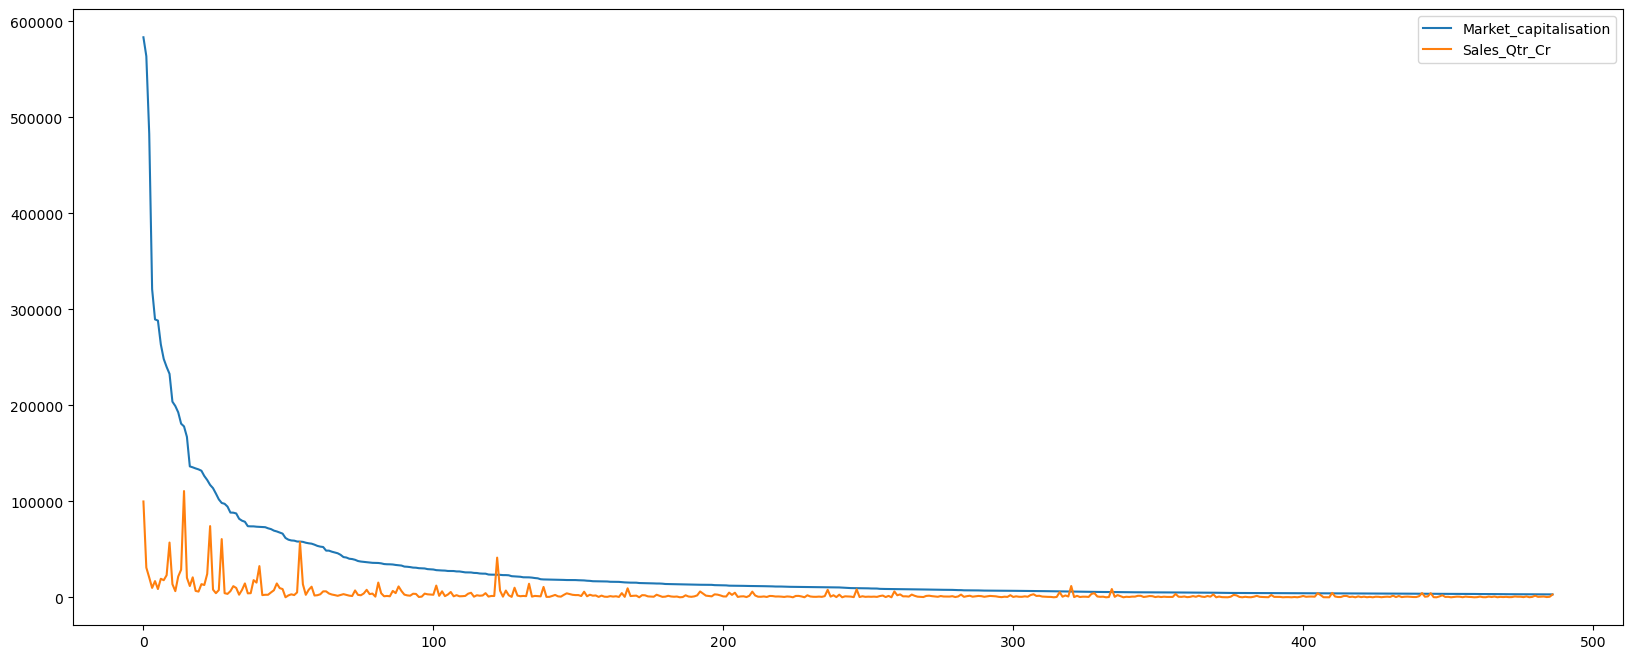

In [31]:
df.plot(figsize=(20, 8));

Text(0.5, 1.0, 'Distributions')

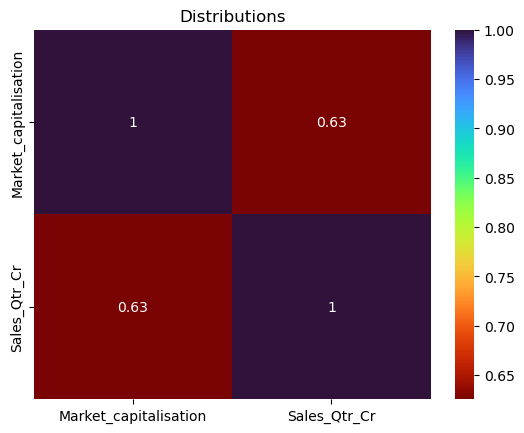

In [32]:
corr_df = df.corr()
sns.heatmap(corr_df, xticklabels=corr_df,  yticklabels=corr_df, cmap='turbo_r', annot=True)
plt.title('Distributions')

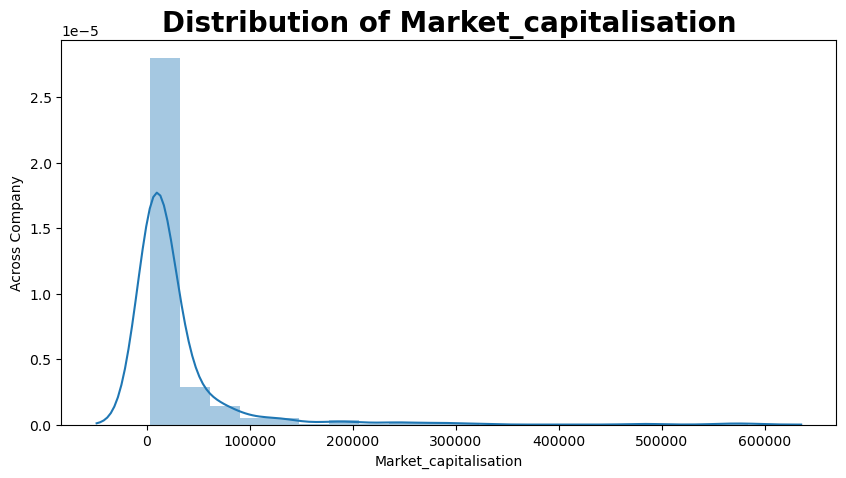

In [33]:
Market_capitalisation = df['Market_capitalisation'].value_counts()
plt.figure(figsize=(10, 5))
sns.distplot(df['Market_capitalisation'], bins=20)
plt.title('Distribution of Market_capitalisation', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Market_capitalisation')
plt.ylabel('Across Company')
plt.show()

In [34]:
graph = df["Market_capitalisation"]

mean_price = graph.mean()
median_price = graph.median()
std = graph.std()

skewness = (3 * (mean_price - median_price)) / std

print(f"The skewness score of market_capitalisation: {skewness:.5f}")



The skewness score of market_capitalisation: 0.91611


<AxesSubplot:xlabel='Market_capitalisation', ylabel='Sales_Qtr_Cr'>

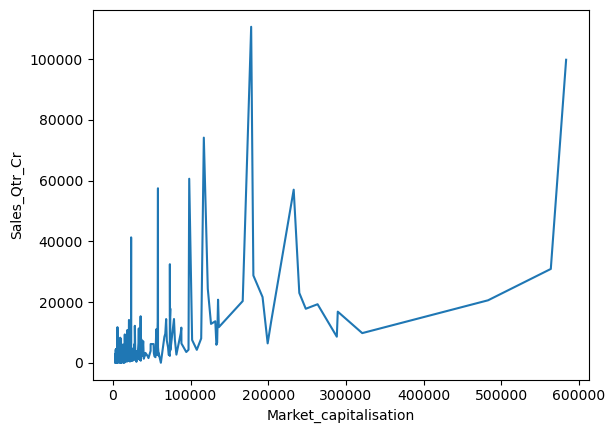

In [35]:
sns.lineplot(x="Market_capitalisation", y="Sales_Qtr_Cr", data=df)

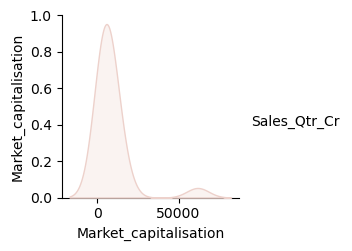

In [36]:
sns.pairplot(data=df, hue="Sales_Qtr_Cr")

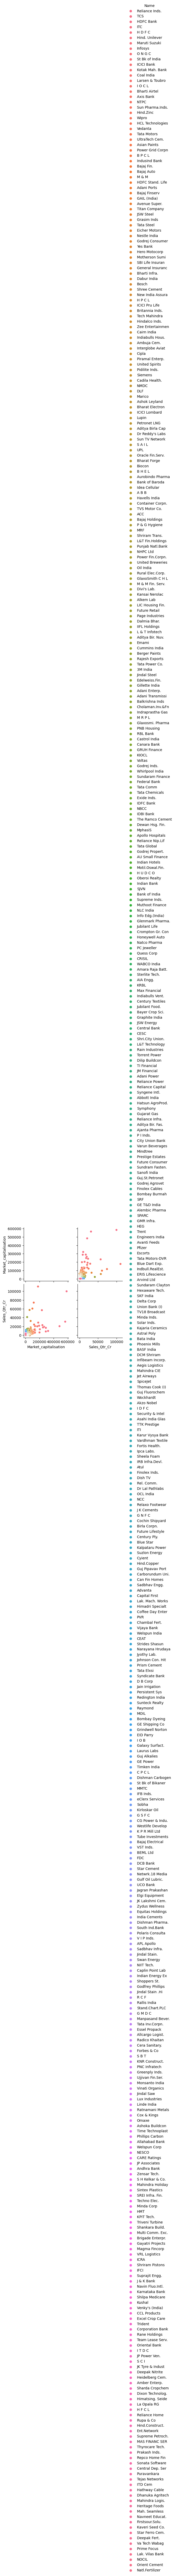

In [37]:
sns.pairplot(data=df, hue="Name")

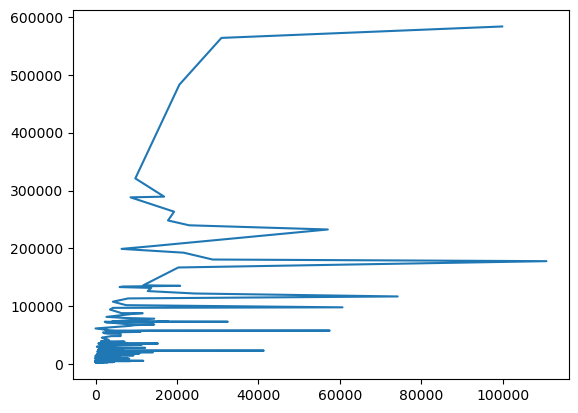

In [38]:
plt.plot(df.Sales_Qtr_Cr, df.Market_capitalisation)

Text(0.5, 1.0, 'Distributions')

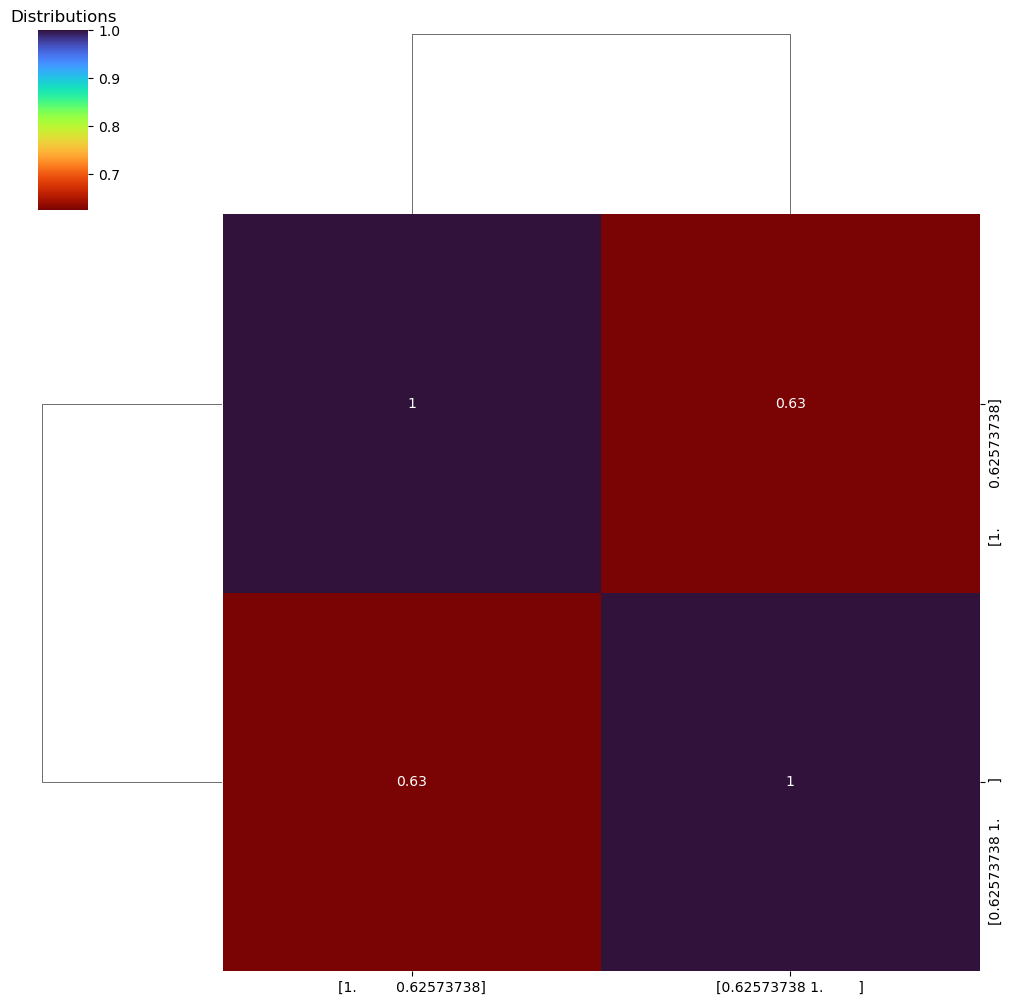

In [39]:
corr_df = df.corr()
sns.clustermap(corr_df, xticklabels=corr_df,  yticklabels=corr_df, cmap='turbo_r', annot=True)
plt.title('Distributions')

In [40]:
print(df[['Market_capitalisation', 'Sales_Qtr_Cr']].corr())

                       Market_capitalisation  Sales_Qtr_Cr
Market_capitalisation               1.000000      0.625737
Sales_Qtr_Cr                        0.625737      1.000000


In [41]:
print(df[['Market_capitalisation', 'Sales_Qtr_Cr']].mean())

Market_capitalisation    28043.857119
Sales_Qtr_Cr              3648.800292
dtype: float64


In [42]:
print(df[['Market_capitalisation', 'Sales_Qtr_Cr']].median())

Market_capitalisation    9885.05
Sales_Qtr_Cr             1012.94
dtype: float64


In [43]:
print(df[['Market_capitalisation', 'Sales_Qtr_Cr']].var())

Market_capitalisation    3.536041e+09
Sales_Qtr_Cr             9.619517e+07
dtype: float64
